## 7.2 图像数据处理
在之前的几章中多次使用到了图像识别数据集。然而在之前的章节都是直接使用图像原始的像素矩阵。这一节将介绍图像的预处理过程。**通过对图像的预处理，可以尽量避免模型受到无关因素的影响。**在大部分图像识别问题中，通过图像预处理过程可以提高模型的准确率。在7.2.1节中将先介绍TensorFlow提供的主要图像处理函数，并给出具体图像在处理前和处理后的变化让读者有一个直观的了解。然后在7.2.2节中将给出一个完整的图像预处理流程。

### 7.2.1 TensorFlow图像处理函数

**1. 图像编码处理**

在之前的章节中提到一张RGB色彩模式的图像可以看成一个三维矩阵，矩阵中的每一个数表示了图像上不同位置，不同颜色的亮度。**然而图像在存储时并不是直接记录这些矩阵中的数字，而是记录经过压缩编码之后的结果**。所以要将一张图像还原成一个三维矩阵，需要解码的过程。

TensorFlow提供了对jpeg和png格式图像的编码/解码函数。`tf.image.decode_jpeg`、`tf.image.decode_png`、`tf.image.encode_jpeg`、`tf.image.encode_png` 。以下代码示范了如何使用TensorFlow中对jpeg格式图像进行编码/解码：

shape:  (1797, 2673, 3) 
 [[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]


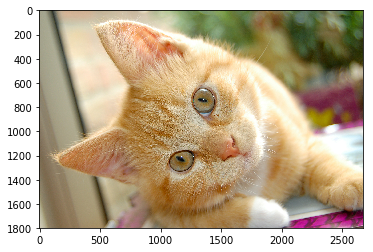

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np
%matplotlib inline

# 读取图像的原始数据
image_raw_data = tf.gfile.FastGFile(name="../../datasets/cat.jpg", mode='rb').read()

with tf.Session() as sess:
    # 对图像进行jpeg的格式解码从而得到图像对应的三维矩阵。
    # 解码之后的结果为一个张量，在使用它的取值之前需要明确调用运行的过程。
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵及其shape（即图片大小和色彩方式）
    print('shape: ', img_data.eval().shape, '\n', img_data.eval())
    
    # 使用pyplot工具可视化得到的图像
    plt.imshow(img_data.eval())
    plt.show()
    
    # 将表示一张图像的三维矩阵重新按照jpeg格式编码并存入文件中。
    encoded_image = tf.image.encode_jpeg(img_data)
    with tf.gfile.GFile(name='cat_encoded.jpg', mode="wb") as f:
        f.write(encoded_image.eval())

**2. 图片大小调整**

**目的：**一般来说，网络上获取的图像大小是不固定，但神经网络输入节点的个数是固定的。所以在将图像的像素作为输入提供给神经网络之前，需要先将图像的大小统一。这就是图像大小调整需要完成的任务。

**图像大小调整有两种方式，第一种是通过算法使得新的图像尽量保存原始图像上的所有信息。**TensorFlow提供了4种不同的方法，并且将它们封装到了`tf.image.resize_ images`函数。以下代码示范了如何使用这个函数:

[[[0.63529414 0.6313726  0.54901963]
  [0.63529414 0.63529414 0.5411765 ]
  [0.6313726  0.6313726  0.5372549 ]
  ...
  [0.4156863  0.54901963 0.18039216]
  [0.39607847 0.5372549  0.18431373]
  [0.40000004 0.5529412  0.20392159]]

 [[0.6431373  0.63529414 0.54509807]
  [0.6392157  0.6313726  0.53333336]
  [0.6392157  0.6313726  0.5411765 ]
  ...
  [0.40784317 0.5411765  0.16862746]
  [0.40000004 0.54509807 0.18039216]
  [0.42352945 0.5411765  0.19607845]]

 [[0.64705884 0.6392157  0.54901963]
  [0.64705884 0.6392157  0.5411765 ]
  [0.6392157  0.6313726  0.53333336]
  ...
  [0.40784317 0.5294118  0.16078432]
  [0.40000004 0.5372549  0.16862746]
  [0.42352945 0.54509807 0.1764706 ]]

 ...

 [[0.8117648  0.7843138  0.70980394]
  [0.8078432  0.7803922  0.7058824 ]
  [0.8078432  0.7803922  0.7058824 ]
  ...
  [0.427451   0.32941177 0.20784315]
  [0.41960788 0.32941177 0.20784315]
  [0.4156863  0.31764707 0.19607845]]

 [[0.80392164 0.7843138  0.7058824 ]
  [0.80392164 0.7843138  0.7058824 ]


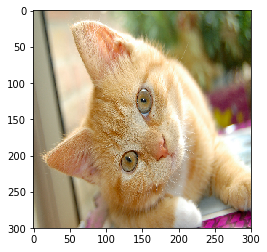

interpolation method:  最近邻插值法


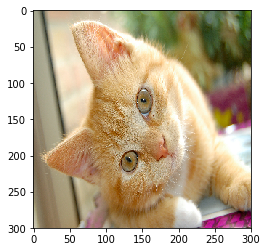

interpolation method:  双三次插值法


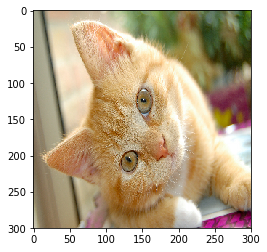

interpolation method:  面积插值法


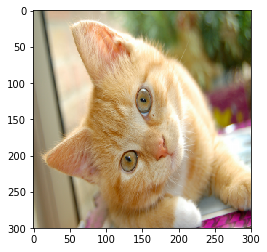

In [2]:
with tf.Session() as sess:
    # 如果直接以0-255范围的整数数据输入resize_images，那么输出将是0-255之间的实数，
    # 不利于后续处理。本书建议在调整图片大小前，先将图片转为0-1范围的实数。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    print(image_float.eval())
    
    # 通过tf.image.resize_images函数调整图像的大小。这个函数第一个参数为原始图像，
    # 第二个参数为调整后图像的大小，method参数给出了调整图像大小的算法。
    # 注意，如果输入数据是unit8格式，那么输出将是0～255之内的实数，不方便后续处理。
    # 本书建议在调整图像大小前先转化为实数类型。
    methods = ['双线性插值法', '最近邻插值法', '双三次插值法', '面积插值法']
    for i in range(4):
        print('interpolation method: ', methods[i])
        resized = tf.image.resize_images(image_float, [300, 300], method=i)
        resized = tf.clip_by_value(resized, 0.0, 1.0)   # clip到0-1之间，色彩调整会讲到
        plt.imshow(resized.eval())
        plt.show()

大多数图像处理API支持整数和实数类型的输入。如果输入是整数类型，这些API会在内部将输入转化为实数后处理，再将输出转化为整数。如果有多个处理步骤，在整数数和实数之间的反复转化将导致精度损失，因此推荐图像处理前将其转化为实数类型，即`tf.image.convert_image_dtype(img_data, tf.float32)`。
<p align='center'>
    <img src=images/表7.1.JPG>
</p>

上表给出了`tf.image.resize_images`函数的method参数的取值对应的图像大小调整算法。从上个cell输出图片可以看出，不同算法调整出来的结构会有细微差别，但是不会相差太远。

不同于第一种图像调整方法的会保存完整图像信息，**第二种调整方法是对图像进行剪裁或填充**。以下代码展示了通过`tf.image.resize_image_with_crop_or_pad`函数来调整图像大小的功能：

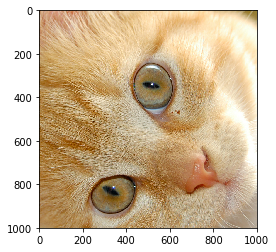

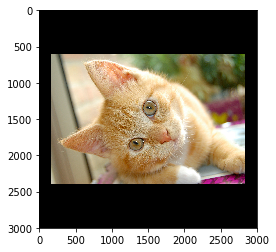

In [3]:
with tf.Session() as sess:    
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000)
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

上面函数的第一个参数为原始图像，后面两个参数是调整后的目标图像大小。
- 如果原始图像的尺寸大于目标图像，那么这个函数会自动截取原始图像中居中的部分；
- 如果目标图像的尺寸大于原始图像，那么这个函数会自动再原始图像的周围填充0背景。

TensorFlow还支持**通过比例调整图像大小**，以下代码给出了使用函数`tf.image.central_crop`来通过比例（这个比例区间为(0, 1]）调整图像的样例：

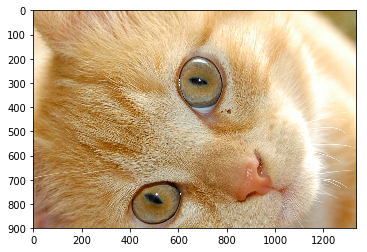

In [4]:
with tf.Session() as sess:   
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_cropped.eval())
    plt.show()

上面介绍的图像裁剪函数都是截取或者填充图像中间的部分。TensorFlow也提供`tf.image.crop_to_bounding_box`函数和`tf.image.pad_to_bounding_ box`函数来剪裁或者填充给定区域的图像。这两个函数都要求给出的尺寸满足一定的要求，否则程序会报错。比如对于前者，TensorFlow要求提供的图像尺寸要大于目标尺寸，也就是要求原始图像能够裁剪出目标图像的大小。这里就不再给出每个函数的具体样例，有兴趣的读者可以自行参考TensorFlow的API文档。

**3. 图像翻转**

TensorFlow也支持对图像进行上下翻转、左右翻转以及沿对角线翻转。

**在很多图像识别问题中，图像的翻转不应该影响识别的结果。**于是在训练图像识别的经网络模型时，可以随机地翻转训练图像，这样训练得到的模型可以识别不同角度的实体。比如假设在训练数据中所有的猫头都是向右的，那么训练出来的模型就无法很好地识别猫头向左的猫。虽然这个问题可以通过收集更多的训练数据来解决，但是通过随机翻转训练图像的方式可以在零成本的情况下很大程度地缓解该问题。**所以随机翻转训练图像是一种很常用的图像预处理方式。**TensorFlow提供了方便的API完成随机图像翻转的过程。

图像翻转的示例代码如下：

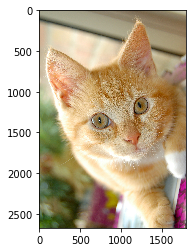

In [5]:
with tf.Session() as sess: 
    # 上下翻转
#     flipped = tf.image.flip_up_down(img_data)
    # 左右翻转
#     flipped = tf.image.flip_left_right(img_data)
    #对角线翻转
    flipped = tf.image.transpose_image(img_data)
    # 以一定概率上下翻转图片。
#     flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
#     flipped = tf.image.random_flip_left_right(img_data)
    
    plt.imshow(flipped.eval())
    plt.show()

**4. 图片色彩调整**

**和图像翻转类似，调整图像的亮度(brightness)、对比度(contrast)、色相(hue)和饱和度(saturation)在很多图像识别应用中都不应该影响识别结果。所以在训练神经网络模型时，可以随机调整训练图像的这些属性，从而使训练得到的模型尽可能小地受到无关因素的影响。**TensorFlow提供了调整这些色彩相关属性的API。

**色彩调整的API可能导致像素的实数值超出0.0-1.0的范围，因此在输出最终图像前需要将其值截断在0.0-1.0范围区间，否则不仅图像无法正常可视化，以此为输入的神经网络的训练质量也可能受到影响。如果对图像进行多项处理操作，那么这一截断过程应当在所有处理完成后进行。**举例而言，假如对图像依次提高亮度和减少对比度，那么第二个操作可能将第一个操作生成的的部分过亮的像素拉回到1.0的范围内，因此在第一个操作后不应该立即截断。

以下代码显示了如何修改图像的**亮度(brightness)**和**对比度(contrast)**：

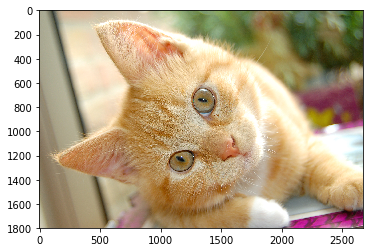

In [6]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 将图片的亮度-0.5。
#     adjusted = tf.image.adjust_brightness(image_float, -0.5)
    
    # 将图片的亮度-0.5
#     adjusted = tf.image.adjust_brightness(image_float, 0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    adjusted = tf.image.random_brightness(image_float, max_delta=0.5)
    
    # 将图片的对比度-0.5倍
#     adjusted = tf.image.adjust_contrast(image_float, -5)
    
    # 将图片的对比度+5倍
#     adjusted = tf.image.adjust_contrast(image_float, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
#     adjusted = tf.image.random_contrast(image_float, lower, upper)

    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

以下代码显示了如何修改图像的**色相(hue)**和**饱和度(saturation)**：

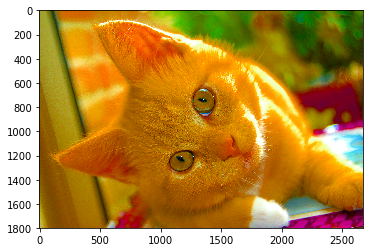

In [7]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
#     adjusted = tf.image.adjust_hue(image_float, 0.1)
#     adjusted = tf.image.adjust_hue(image_float, 0.3)
#     adjusted = tf.image.adjust_hue(image_float, 0.6)
#     adjusted = tf.image.adjust_hue(image_float, 0.9)
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
#     adjusted = tf.image.random_hue(image_float, max_delta)
    
    # 将图片的饱和度-5。
#     adjusted = tf.image.adjust_saturation(image_float, -5)
    # 将图片的饱和度+5。
    adjusted = tf.image.adjust_saturation(image_float, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
#     adjusted = tf.image.random_saturation(image_float, lower, upper)
    
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

除了调整图像的亮度、对比度、饱和度和色相，TensorFlow还提供API来完成**图像标准化**的过程——将图像上的亮度均值变为0，方差变为1。如下：

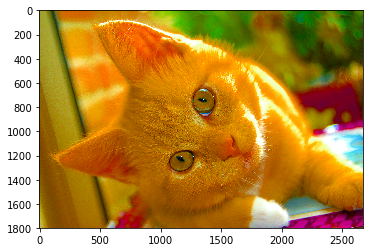

In [8]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    adjusted = tf.image.per_image_whitening(image_float)
    
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

**5. 处理标注框 & 随机截取图像**

在很多图像识别的数据集中，图像中需要关注的物体通常会被标注框圈出来。TensorFlow提供了`tf.image.draw_bounding_boxes`函数来**处理标注框**:

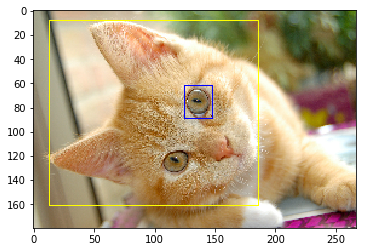

In [9]:
with tf.Session() as sess:     
    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(img_data, [180, 267], method=1)
    
    # tf.image.draw_bounding_boxes要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(image_small, tf.float32)
    #    第一个参数是一个batch的数据，也就是四维的；
    batchced_img = tf.expand_dims(image_float, 0)
    #    第二个参数是实数型，0-1之间，是相对值
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    result = tf.image.draw_bounding_boxes(batchced_img, boxes)
    plt.imshow(result[0].eval())
    plt.show()

**和随机翻转图像、随机调整颜色类似，随机截取图像上有信息含量的部分也是一个提高模型健壮性（robustness）的一种方式。**这样可以使训练得到的模型不受被识别物体大小的影响。以下程序中展示了如何通过`tf.image.sample_distorted_bounding_ box`函数来完成随机截取图像的过程:

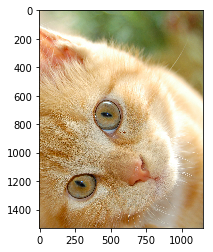

[[[0.22036728 0.00112233 0.9154146  0.3812196 ]]]


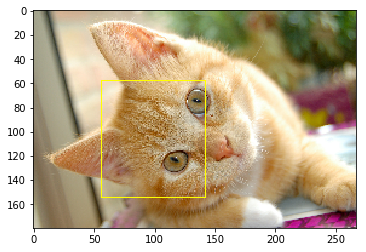

In [10]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    
    # sample_distorted_bounding_box要求输入图片必须也是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_float), bounding_boxes=boxes, min_object_covered=0.4)
    
    # 截取后的图片
    distorted_image = tf.slice(image_float, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()

    # 在原图上用标注框画出截取的范围
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    batchced_img = tf.expand_dims(image_small, 0)
    image_with_box = tf.image.draw_bounding_boxes(batchced_img, bbox_for_draw)
    print(bbox_for_draw.eval())
    plt.imshow(image_with_box[0].eval())
    plt.show()

### 7.2.2 图像预处理完整样例
上小节详细讲解了TensorFlow提供的主要图像处理函数。
- **图像编码处理。**`tf.image.decode_jpeg`、`tf.image.decode_png`、`tf.image.encode_jpeg`、`tf.image.encode_png` 。
- **图像大小调整。**保存全部信息的`tf.image.resize_ images`、对图像剪裁或填充的`tf.image.resize_image_with_crop_or_pad`、比例调整`tf.image.central_crop`。
- **图像反转。**`tf.image.flip_up_down`、`tf.image.flip_left_right(img_data)`、`tf.image.transpose_image`以及前两者的random。
- **图像色彩调整。**`tf.image.adjust_brightness`、`tf.image.adjust_contrast`、`tf.image.adjust_hue`、`tf.image.adjust_saturation`以及四者的random，以及图像标准化`tf.image.per_image_whitening`。
- **处理边框&随机截取。**`tf.image.draw_bounding_boxes`、`tf.image.sample_distorted_bounding_box`。

另外，**读取源文件**是`tf.gfile.FastGFile(name="../../datasets/cat.jpg", mode="rb").read()`，**保存文件**是`tf.gfile.GFile(name='cat_encoded.jpg', mode="wb").write()`。

在解决真实的图像识别问题时，一把会使用多种处理方法，下面给出一个样例：

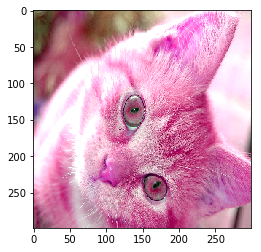

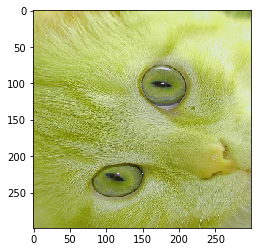

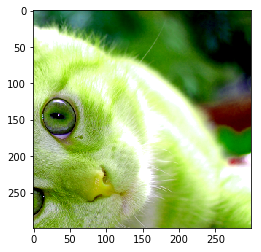

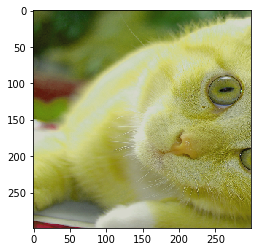

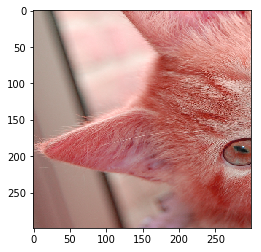

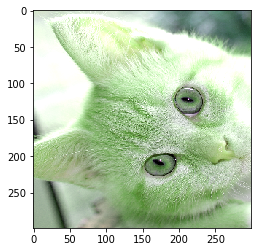

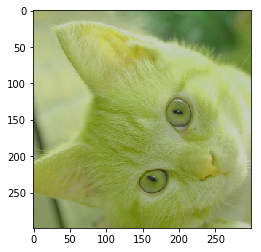

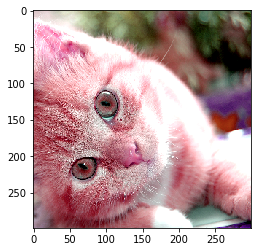

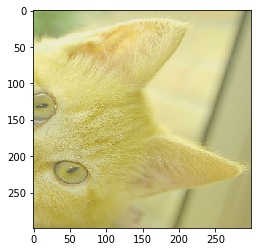

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 给定一张图像，随机调整图像的色彩。因为调整亮度、对比度、饱和度和色相的顺序会影
# 最后得到的结果，所以可以定义多种不同的顺序。具体使用哪一种顺序可以在训练数据
# 预处理时随机地选择一种。这样可以进一步降低无关因素对模型的影响。
def distort_color(image, color_ordering=0):
    if color_ordering == 0:
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    else:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        image = tf.image.random_brightness(image, max_delta=32./255.)
        image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
        image = tf.image.random_hue(image, max_delta=0.2)

    return tf.clip_by_value(image, 0.0, 1.0)


# 给定一张解码后的图像、目标图像的尺寸以及图像上的标注框，此函数可以对给出的图像进行顶
# 处理。这个函数的输入图像是图像识别问题中原始的训练图像，而输出则是神经网络模型的输入
# 层。注意这里只处理模型的训练数据，对于预测的数据，一般不需要使用随机变换的步骤。
def preprocess_for_train(image, height, width, bbox):
    # 查看是否存在标注框
    if bbox is None:
        bbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    # 转换图像张量的类型
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)
        
    # 随机的截取图片中一个块
    bbox_begin, bbox_size, _ = tf.image.sample_distorted_bounding_box(
        tf.shape(image), bounding_boxes=bbox, min_object_covered=0.4)
    distorted_image = tf.slice(image, bbox_begin, bbox_size)

    # 将随机截取的图片调整为神经网络输入层的大小。大小调整的算法时随机的
    distorted_image = tf.image.resize_images(distorted_image, [height, width], 
                                             method=np.random.randint(4))
    # 随机左右翻转
    distorted_image = tf.image.random_flip_left_right(distorted_image)
    # 使用一种随机的顺序调整图像色彩
    distorted_image = distort_color(distorted_image, np.random.randint(2))
    return distorted_image


image_raw_data = tf.gfile.FastGFile("../../datasets/cat.jpg", "rb").read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]])
    for i in range(9):
        result = preprocess_for_train(img_data, 299, 299, boxes)
        plt.imshow(result.eval())
        plt.show()

以上程序完成了**从图像片段截取，到图像大小调整，再到图像反转，最后图像色彩调整的整个图像预处理过程。**这样就可以从一张图片衍生出很多训练样本，通过将训练图片进行预处理，得到神经网络模型可以识别不同大小、方位、色彩等方便的实体。